In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# Generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Car_Brand_Logos/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224, 224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Car_Brand_Logos/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224, 224)
)

Found 1880 files belonging to 5 classes.
Found 250 files belonging to 5 classes.


In [ ]:
resnet = ResNet50(weights = 'imagenet', include_top = False, input_shape= (224, 224, 3))

In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folder_count = glob('/content/drive/MyDrive/Car_Brand_Logos/Train/*')
folder_count

['/content/drive/MyDrive/Car_Brand_Logos/Train/volkswagen',
 '/content/drive/MyDrive/Car_Brand_Logos/Train/hyundai',
 '/content/drive/MyDrive/Car_Brand_Logos/Train/toyota',
 '/content/drive/MyDrive/Car_Brand_Logos/Train/mercedes',
 '/content/drive/MyDrive/Car_Brand_Logos/Train/skoda']

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folder_count), activation = 'softmax')(x)

In [ ]:
prediction

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense_9')>

In [ ]:
model = Model(inputs = resnet.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Car_Brand_Logos/Train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Car_Brand_Logos/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1880 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [ ]:
history = model.fit_generator(training_set,
                    validation_data = test_set,
                    epochs = 25,
                    steps_per_epoch = len(training_set),
                    validation_steps = len(test_set)
)

<ipython-input-22-b01c19432c7e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/25
59/59 [==============================] - 39s 609ms/step - loss: 3.0620 - accuracy: 0.3729 - val_loss: 2.0949 - val_accuracy: 0.4480
Epoch 2/25
59/59 [==============================] - 34s 572ms/step - loss: 1.3315 - accuracy: 0.5176 - val_loss: 2.2411 - val_accuracy: 0.3880
Epoch 3/25
59/59 [==============================] - 35s 589ms/step - loss: 1.4349 - accuracy: 0.5420 - val_loss: 1.3501 - val_accuracy: 0.5680
Epoch 4/25
59/59 [==============================] - 36s 605ms/step - loss: 1.1432 - accuracy: 0.6048 - val_loss: 1.8473 - val_accuracy: 0.5000
Epoch 5/25
59/59 [==============================] - 34s 574ms/step - loss: 1.1218 - accuracy: 0.6133 - val_loss: 1.4182 - val_accuracy: 0.5720
Epoch 6/25
59/59 [==============================] - 35s 594ms/step - loss: 1.1274 - accuracy: 0.6202 - val_loss: 1.4165 - val_accuracy: 0.5840
Epoch 7/25
59/59 [==============================] - 33s 568ms/step - loss: 1.1224 - accuracy: 0.6441 - val_loss: 1.6279 - val_accuracy: 0.5840

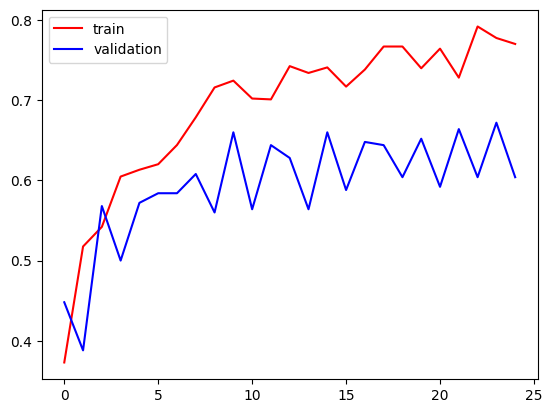

In [ ]:
plt.plot(history.history['accuracy'], label = 'train', color = 'red')
plt.plot(history.history['val_accuracy'], label = 'validation', color = 'blue')
plt.legend()
plt.show()

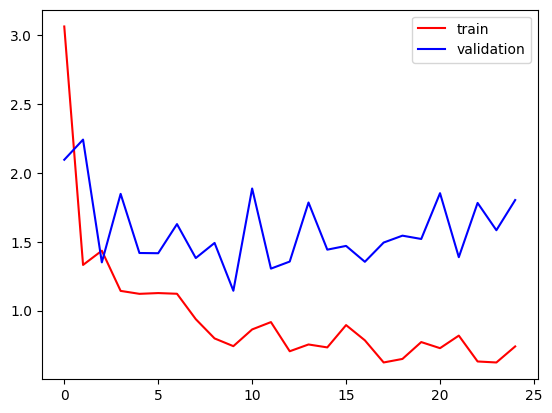

In [ ]:
plt.plot(history.history['loss'], label = 'train', color = 'red')
plt.plot(history.history['val_loss'], label = 'validation', color = 'blue')
plt.legend()
plt.show()

In [ ]:
model.save('final_model.h5')

In [ ]:
y_pred = model.predict(test_set)

8/8 [==============================] - 4s 300ms/step


In [ ]:
y_pred

array([[1.0316722e-06, 9.9997985e-01, 1.5639152e-05, 2.1582553e-06,
        1.3497672e-06],
       [3.8637784e-03, 8.0737835e-01, 1.1927904e-01, 2.9341647e-02,
        4.0137243e-02],
       [1.0298333e-03, 9.9279541e-01, 2.0915163e-03, 1.6118663e-03,
        2.4713147e-03],
       ...,
       [3.2846818e-03, 1.6995458e-01, 1.4418886e-04, 9.0189831e-04,
        8.2571471e-01],
       [1.5694329e-06, 3.0056524e-04, 6.1578298e-04, 5.1505901e-03,
        9.9393153e-01],
       [4.6200086e-03, 3.7012297e-01, 5.3124356e-01, 2.6669723e-04,
        9.3746811e-02]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([1, 1, 1, 1, 3, 4, 1, 1, 0, 1, 4, 1, 1, 4, 1, 3, 3, 3, 0, 3, 4, 1,
       1, 0, 1, 0, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 0, 1,
       2, 0, 0, 2, 4, 2, 2, 1, 4, 4, 3, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 4, 1, 3, 3, 2, 4, 1, 2, 1, 4, 4, 4, 1, 2, 4,
       1, 1, 1, 1, 2, 4, 1, 1, 4, 1, 1, 1, 0, 3, 1, 1, 4, 2, 1, 2, 0, 1,
       1, 1, 4, 4, 4, 1, 3, 1, 3, 1, 4, 2, 1, 3, 1, 2, 4, 1, 3, 3, 1, 2,
       3, 2, 0, 2, 4, 1, 2, 3, 2, 4, 3, 3, 0, 4, 1, 1, 1, 1, 2, 1, 1, 3,
       1, 1, 4, 1, 4, 4, 1, 1, 1, 4, 0, 1, 1, 2, 4, 0, 1, 1, 2, 1, 0, 3,
       0, 4, 1, 1, 0, 2, 4, 1, 4, 4, 3, 4, 0, 1, 1, 2, 3, 2, 4, 1, 1, 3,
       1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 4, 1, 3, 4, 1, 0, 1, 2, 4,
       1, 0, 3, 4, 1, 0, 2, 0, 4, 3, 2, 1, 4, 1, 1, 2, 4, 1, 1, 1, 0, 1,
       1, 4, 1, 3, 4, 4, 4, 2])

In [ ]:
img = load_img('/content/drive/MyDrive/Car_Brand_Logos/Test/hyundai/hyundai-logo-teknolama.jpg', target_size = (224, 224))

In [ ]:
x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [ 40.,  42.,  18.],
        [ 43.,  44.,  13.],
        [ 22.,  28.,   2.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [ 18.,  20.,   0.],
        [ 38.,  36.,  13.],
        [ 30.,  35.,  12.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [ 95.,  94.,  73.],
        [ 26.,  21.,   2.],
        [ 23.,  27.,   0.]],

       ...,

       [[130., 109.,  28.],
        [151., 125.,  50.],
        [142., 122.,  25.],
        ...,
        [  2.,   3.,   0.],
        [  3.,   3.,   1.],
        [  0.,   0.,   0.]],

       [[137., 111.,  36.],
        [138., 112.,  25.],
        [144., 122.,  20.],
        ...,
        [  6.,   7.,   2.],
        [  1.,   1.,   0.],
        [  8.,   8.,   6.]],

       [[127., 108.,  40.],
        [136., 114.,  29.],
        [147., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = x / 255

In [ ]:
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.15686275, 0.16470589, 0.07058824],
        [0.16862746, 0.17254902, 0.05098039],
        [0.08627451, 0.10980392, 0.00784314]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.07058824, 0.07843138, 0.        ],
        [0.14901961, 0.14117648, 0.05098039],
        [0.11764706, 0.13725491, 0.04705882]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.37254903, 0.36862746, 0.28627452],
        [0.10196079, 0.08235294, 0.00784314],
        [0.09019608, 0.10588235, 0.        ]],

       ...,

       [[0.50980395, 0.42745098, 0.10980392],
        [0.5921569 , 0.49019608, 0.19607843],
        [0.5568628 , 0

In [ ]:
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 36ms/step


array([[2.2280656e-05, 2.7454513e-07, 1.7448869e-09, 9.9955601e-01,
        4.2151037e-04]], dtype=float32)

In [ ]:
z = np.argmax(model.predict(img_data), axis = 1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
z

array([3])

In [ ]:
import cv2

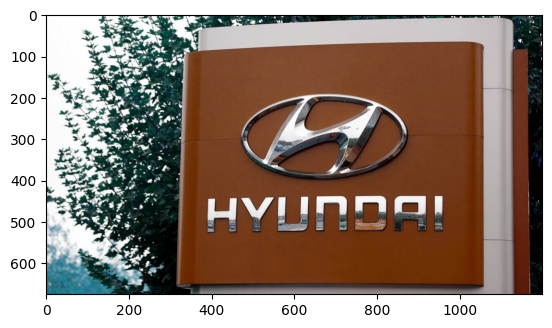

In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/Car_Brand_Logos/Test/hyundai/hyundai-logo-teknolama.jpg')
plt.imshow(test_image)

In [ ]:
test_image = cv2.resize(test_image, (224, 224))

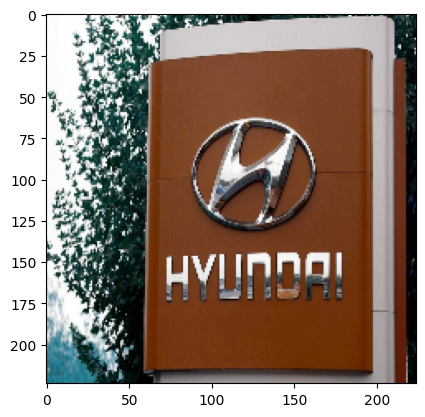

In [ ]:
plt.imshow(test_image)

In [ ]:
test_input = test_image.reshape((1, 224, 224, 3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[0.0000000e+00, 3.1881697e-37, 1.0043010e-22, 1.0000000e+00,
        7.5879271e-14]], dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(test_input))

1/1 [==============================] - 0s 26ms/step


In [ ]:
y_pred

3